## Homework-3: MNIST Classification with ConvNet

### **Deadline: 2020.04.07 11:59:00 AM**

### In this homework, you need to
- #### implement forward and backward for ConvLayer (`layers/conv_layer.py`)
- #### implement forward and backward for PoolingLayer (`layers/pooling_layer.py`)
- #### implement forward and backward for DropoutLayer (`layers/dropout_layer.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [1, 28, 28])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))
x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyperparameters
You can modify hyperparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate = 0.003
weight_decay = 0.005

disp_freq = 50

## Criterion and Optimizer

In [6]:
from criterion import SoftmaxCrossEntropyLossLayer
from optimizer import SGD

criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate, weight_decay)

## ConvNet

In [7]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer

convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(FCLayer(128, 10))

In [8]:
# Train
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][20]	 Batch [0][550]	 Training Loss 8.3866	 Accuracy 0.0500
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.0920	 Accuracy 0.4341
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5510	 Accuracy 0.5574
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.2922	 Accuracy 0.6203
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.1281	 Accuracy 0.6656
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.0141	 Accuracy 0.6975
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.9301	 Accuracy 0.7205
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.8659	 Accuracy 0.7388
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.8128	 Accuracy 0.7545
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.7695	 Accuracy 0.7673
Epoch [0][20]	 Batch [500][550]	 Training 

In [9]:
# Test
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9615.



## Plot

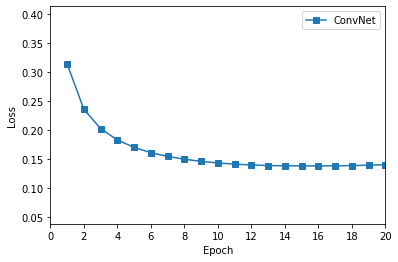

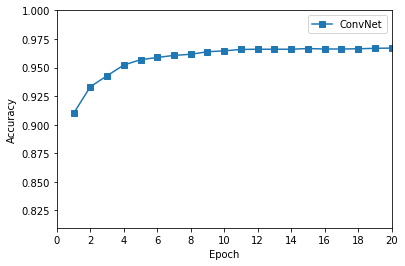

In [10]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})

### ~~You have finished homework3, congratulations!~~  

**Next, according to the requirements (4):**
### **You need to implement the Dropout layer and train the network again.**

In [7]:
from layers import FCLayer, ReLULayer, ConvLayer, MaxPoolingLayer, ReshapeLayer, DropoutLayer

# build your network
convNet = Network()
convNet.add(ConvLayer(1, 8, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ConvLayer(8, 16, 3, 1))
convNet.add(ReLULayer())
convNet.add(MaxPoolingLayer(2, 0))
convNet.add(ReshapeLayer((batch_size, 16, 7, 7), (batch_size, 784)))
convNet.add(FCLayer(784, 128))
convNet.add(ReLULayer())
convNet.add(DropoutLayer())
convNet.add(FCLayer(128, 10))

# training
convNet.is_training = True
convNet, conv_loss, conv_acc = train(convNet, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

# testing
convNet.is_training = False
test(convNet, criterion, data_test, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][20]	 Batch [0][550]	 Training Loss 17.4160	 Accuracy 0.0900
Epoch [0][20]	 Batch [50][550]	 Training Loss 3.2989	 Accuracy 0.4298
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.3259	 Accuracy 0.5169
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.9377	 Accuracy 0.5603
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.7028	 Accuracy 0.5930
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.5285	 Accuracy 0.6224
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.4068	 Accuracy 0.6432
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.3166	 Accuracy 0.6598
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.2433	 Accuracy 0.6738
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.1828	 Accuracy 0.6853
Epoch [0][20]	 Batch [500][550]	 Training

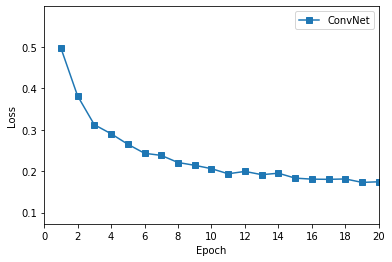

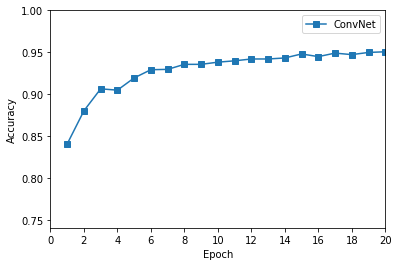

In [8]:
plot_loss_and_acc({'ConvNet': [conv_loss, conv_acc]})